# OD PROJECT - First Delivery

## Group 14
### Madalena Sampaio 93294
### Maria Cardoso 93661
### João Rosado 96409

In [4]:
import math
import random
import pandas as pd
import numpy
from functools import reduce
import sys
import getopt
import re
import matplotlib.pyplot as plt

alfa = 2
beta = 4
sigm = 5
ro = 0.9
th = 1

iterations = 1000
ants = 100


def getData(fileName, sheet):
    df = pd.read_excel(fileName, sheet)
    graph = df[['Location', 'X', 'Y']].values
    demand = df[['Location', 'Demand']].values
    
    graph = {int(a):(int(b),int(c)) for a,b,c in graph}
    demand = {int(a):int(b) for a,b in demand}
    capacity = int(112)
    optimalValue = int(1071)
    return capacity, graph, demand, optimalValue

def generateGraph():
    capacityLimit, graph, demand, optimalValue = getData("benchmarks.xlsx", "101_nodes")
    vertices = list(graph.keys())

    edges = { (min(a,b),max(a,b)) : numpy.sqrt((graph[a][0]-graph[b][0])**2 + (graph[a][1]-graph[b][1])**2) for a in graph.keys() for b in graph.keys() if a!=b}
    feromones = { (min(a,b),max(a,b)) : 1 for a in graph.keys() for b in graph.keys() if a!=b }
    
    return vertices, edges, capacityLimit, demand, feromones, optimalValue

def solutionOfOneAnt(vertices, edges, capacityLimit, demand, feromones):
    alfa = 2  # CHANGEABLE
    beta = 4  # CHANGEABLE
    
    solution = list()
    depot = vertices[0]
    path = list()
    path.append(depot)
    vertices.remove(1)

    city = depot
    capacity = capacityLimit

    while(len(vertices)!=0):
        probabilities = list(map(lambda x: ((feromones[(min(x, city), max(x, city))])**alfa) * ((1 / edges[(min(x, city), max(x, city))])**beta), vertices))
        probabilities = probabilities/numpy.sum(probabilities)
            
        city = numpy.random.choice(vertices, p=probabilities)
        capacity = capacity - demand[city]

        if(capacity>0):
            path.append(city)
            vertices.remove(city)
        else:
            path.append(depot)
            solution.append(path)
            path = list()
            path.append(depot)
            city = depot
            capacity = capacityLimit
    path.append(depot)
    solution.append(path)
    
    return solution

def rateSolution(solution, edges):
    s = 0
    for i in solution:
        a = 1
        for j in i[1:-1]:
            b = j
            s += edges[(min(a,b), max(a,b))]
            a = b
        b = 1
        s = s + edges[(min(a,b), max(a,b))]
    return s

def updateFeromone(feromones, solutions, bestSolution):
    sigm = 5  # CHANGEABLE
    ro = 0.9  # CHANGEABLE
    th = 1  # CHANGEABLE
    
    Lavg = reduce(lambda x,y: x+y, (i[1] for i in solutions))/len(solutions)
    feromones = { k : ro*v + th/Lavg for (k,v) in feromones.items() }
    solutions.sort(key = lambda x: x[1])
    if(bestSolution!=None):
        if(solutions[0][1] < bestSolution[1]):
            bestSolution = solutions[0]
        for path in bestSolution[0]:
            for i in range(len(path)-1):
                feromones[(min(path[i],path[i+1]), max(path[i],path[i+1]))] = sigm/bestSolution[1] + feromones[(min(path[i],path[i+1]), max(path[i],path[i+1]))]
    else:
        bestSolution = solutions[0]
    for l in range(sigm):
        paths = solutions[l][0]
        L = solutions[l][1]
        for path in paths:
            for i in range(len(path)-1):
                feromones[(min(path[i],path[i+1]), max(path[i],path[i+1]))] = (sigm-(l+1)/L**(l+1)) + feromones[(min(path[i],path[i+1]), max(path[i],path[i+1]))]
    return bestSolution

def main():
    bestSolution = None
    vertices, edges, capacityLimit, demand, feromones, optimalValue = generateGraph()
    
    for i in range(iterations):
        solutions = list()
        for _ in range(ants):
            solution = solutionOfOneAnt(vertices.copy(), edges, capacityLimit, demand, feromones)
            solutions.append((solution, rateSolution(solution, edges)))
        bestSolution = updateFeromone(feromones, solutions, bestSolution)
        print(str(i)+":\t"+str(int(bestSolution[1]))+"\t"+str(optimalValue))
    return bestSolution

if __name__ == "__main__":
    argv = sys.argv[1:]

    try:
        opts, args = getopt.getopt(argv, "f:a:b:s:r:t:i:n:",["fileName=",
        "alpha=","beta=","sigma=","rho=","theta=","iterations=","numberOfAnts="])
    except getopt.GetoptError:
        print("""use: python ACO_CVRP.py 
            -f <fileName> 
            -a <alpha> 
            -b <beta> 
            -s <sigma> 
            -r <rho> 
            -t <theta>
            -i <iterations>
            -n <numberOfAnts>

            Default values:
            fileName: E-n22-k4.txt
            alpha: 1
            beta: 1
            sigma: 3
            rho: 0.9
            theta: 80
            iterations: 1000
            number of ants: 22""")
        sys.exit(2)
    for opt,arg in opts:
        if(opt in ("-a", "--alpha")):
            alfa = float(arg)
        elif(opt in ("-b", "--beta")):
            beta = float(arg)
        elif(opt in ("-s", "--sigma")):
            sigm = float(arg)
        elif(opt in ("-r", "--rho")):
            ro = float(arg)
        elif(opt in ("-t", "--theta")):
            th = float(arg)
        elif(opt in ("-f", "--fileName", "--file")):
            fileName = str(arg)
        elif(opt in ("-i", "--iterations")):
            iterations = int(arg)
        elif(opt in ("-n", "--numberOfAnts")):
            ants = int(arg)

    print("file name:\t"+str(fileName)+
"\nalpha:\t"+str(alfa)+
"\nbeta:\t"+str(beta)+
"\nsigma:\t"+str(sigm)+
"\nrho:\t"+str(ro)+
"\ntheta:\t"+str(th)+
"\niterations:\t"+str(iterations)+
"\nnumber of ants:\t"+str(ants))

    solution = main()

    print("Solution: "+str(solution))

file name:	C:\Users\jpmrr\AppData\Roaming\jupyter\runtime\kernel-b3734b0b-02a6-4a36-94d5-8ef9b228462a.json
alpha:	2
beta:	4
sigma:	5
rho:	0.9
theta:	1
iterations:	1000
number of ants:	100
0:	1422	1071
1:	1422	1071
2:	1419	1071
3:	1419	1071
4:	1351	1071
5:	1351	1071
6:	1351	1071
7:	1351	1071
8:	1351	1071
9:	1351	1071
10:	1351	1071
11:	1351	1071
12:	1351	1071
13:	1351	1071
14:	1351	1071
15:	1351	1071
16:	1351	1071
17:	1351	1071
18:	1351	1071
19:	1351	1071
20:	1351	1071
21:	1351	1071
22:	1351	1071
23:	1351	1071
24:	1351	1071
25:	1351	1071
26:	1351	1071
27:	1351	1071
28:	1351	1071
29:	1351	1071
30:	1351	1071
31:	1351	1071
32:	1351	1071
33:	1351	1071
34:	1351	1071
35:	1351	1071
36:	1351	1071
37:	1351	1071
38:	1351	1071
39:	1351	1071
40:	1351	1071
41:	1351	1071
42:	1351	1071
43:	1351	1071
44:	1351	1071
45:	1351	1071
46:	1351	1071
47:	1351	1071
48:	1351	1071
49:	1351	1071
50:	1351	1071
51:	1351	1071
52:	1351	1071
53:	1351	1071
54:	1351	1071
55:	1351	1071
56:	1351	1071
57:	1351	1071
58:	1351	1

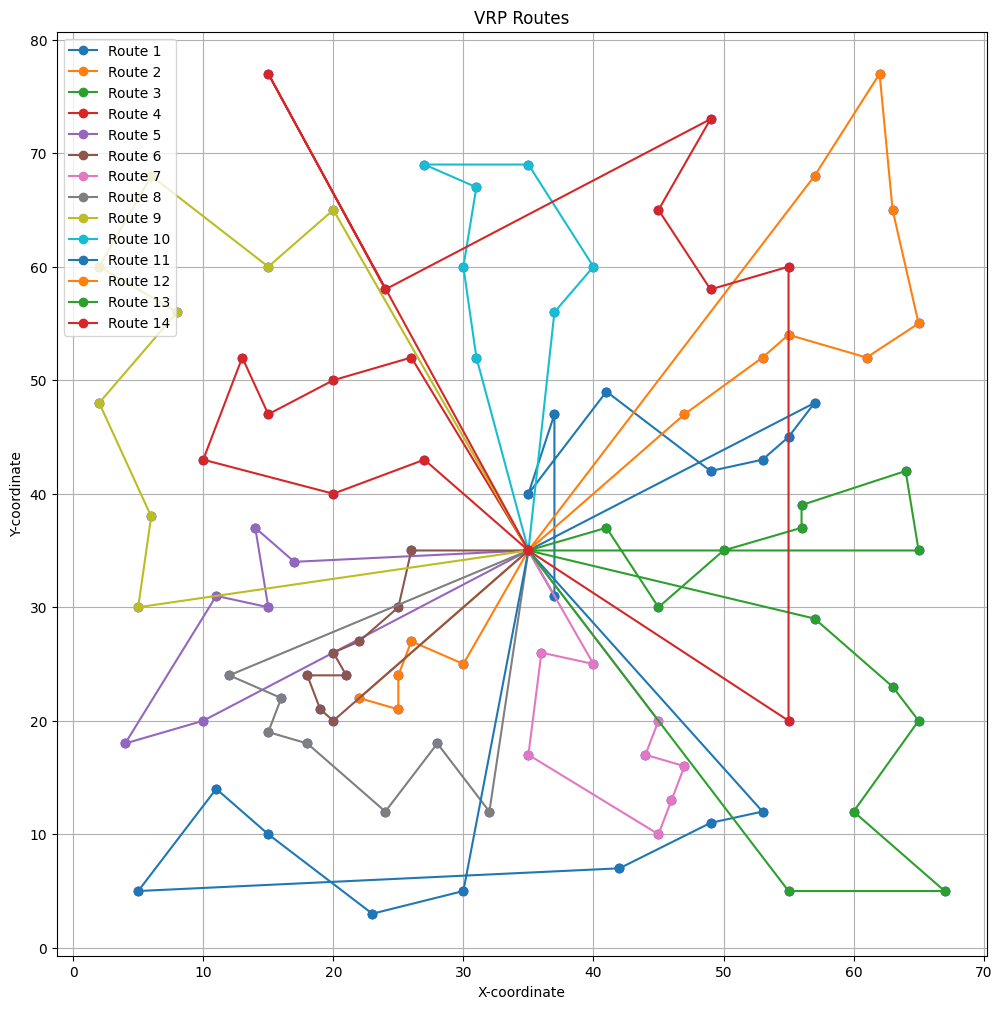

In [5]:
import matplotlib.pyplot as plt

_ , coordinates, _ , _ = getData("benchmarks.xlsx", "101_nodes")

"""
Plot the nodes and routes on a 2D plot.
"""
plt.figure(figsize=(12,12))

x = [value[0] for value in coordinates.values()]
y = [value[1] for value in coordinates.values()]

# Plot the nodes
plt.scatter(x, y, c='blue')

# Plot the routes
flag = 0
for route in solution[0]:
    x_coords = []
    y_coords = []
    flag += 1
    for node in route:
        x_coords.append(x[node-1])
        y_coords.append(y[node-1])
    x_coords.append(x_coords[0])  # Connect back to the start
    y_coords.append(y_coords[0])  # Connect back to the start
    plt.plot(x_coords, y_coords, marker='o', label=f'Route {flag}')

plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.title('VRP Routes')
plt.legend()
plt.grid(True)
plt.show()
